# Assignment

## Connecting to Database

In [14]:
from __future__ import (absolute_import, division, print_function)
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point
from shapely import wkt
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from pprint import pprint

def pgconnect():
    # please replace <your_unikey> and <your_SID> with your own details
    YOUR_UNIKEY = 'mngu3698'
    YOUR_PW     = '490503902'
    DB_LOGIN    = 'y20s1d2x01_'+ YOUR_UNIKEY

    try:
        db_conn_dict = {'host': 'soitpw11d59.shared.sydney.edu.au', 'port': 5432, 'database': DB_LOGIN, 'user':DB_LOGIN , 'password': YOUR_PW }
        conn = psycopg2.connect(**db_conn_dict)
        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
        return None
    return conn

def pgquery( conn, sqlcmd, args=None, msg=False, returntype='tuple'):
    """ utility function to execute some SQL query statement
        it can take optional arguments (as a dictionary) to fill in for placeholders in the SQL
        will return the complete query result as return value - or in case of error: None
        error and transaction handling built-in (by using the 'with' clauses)"""
    retval = None
    with conn:
        cursortype = None if returntype != 'dict' else psycopg2.extras.RealDictCursor
        with conn.cursor(cursor_factory=cursortype) as cur:
            try:
                if args is None:
                    cur.execute(sqlcmd)
                else:
                    cur.execute(sqlcmd, args)
                if (cur.description != None ):
                    retval = cur.fetchall() # we use fetchall() as we expect only _small_ query results
                if msg != False:
                    print("success: " + msg)
            except psycopg2.DatabaseError as e:
                if e.pgcode != None:
                    if msg: print("db read error: "+msg)
                    print(e)
            except Exception as e:
                print(e)
    return retval

In [15]:
# Connecting to database
conn = pgconnect()

connected


## Task 1: Data Integration and Database Generation

### Creating Tables

In [4]:
statistical_areas_table = """CREATE TABLE statistical_areas (
                area_id INTEGER PRIMARY KEY,
                area_name VARCHAR(50) , 
                parent_area_id INTEGER
            );"""

neighbourhoods_table = """CREATE TABLE neighbourhoods (
                area_id INTEGER NOT NULL,
                area_name VARCHAR(50),
                land_area NUMERIC,
                population INTEGER,
                number_of_dwellings INTEGER,
                number_of_businesses INTEGER,
                median_annual_household_income INTEGER,
                avg_monthly_rent INTEGER,
                PRIMARY KEY (area_id),
                FOREIGN KEY (area_id) REFERENCES statistical_areas(area_id)
            );"""

census_stats_table = """CREATE TABLE census_stats (
                area_id INTEGER PRIMARY KEY, 
                median_annual_household_income INTEGER,
                avg_monthly_rent INTEGER
            );"""

population_stats_2016_table = """CREATE TABLE population_stats_2016 (
                area_id INTEGER PRIMARY KEY,
                area_name VARCHAR(50),
                age_0_to_4 INTEGER,
                age_5_to_9 INTEGER,
                age_10_to_14 INTEGER,
                age_15_to_19 INTEGER,
                age_20_to_24 INTEGER,
                age_25_to_29 INTEGER,
                age_30_to_34 INTEGER,
                age_35_to_39 INTEGER,
                age_40_to_44 INTEGER,
                age_45_to_49 INTEGER,
                age_50_to_54 INTEGER,
                age_55_to_59 INTEGER,
                age_60_to_64 INTEGER,
                age_65_to_69 INTEGER,
                age_70_to_74 INTEGER,
                age_75_to_79 INTEGER,
                age_80_to_84 INTEGER,
                age_85_and_over INTEGER,
                total_persons INTEGER,
                females INTEGER,
                males INTEGER
            );"""

health_services_table = """CREATE TABLE health_services (
                id INTEGER PRIMARY KEY,
                name VARCHAR(100),
                category VARCHAR(50),
                num_beds INTEGER,
                address VARCHAR(100),
                suburb VARCHAR(50),
                state VARCHAR(4),
                postcode CHAR(4),
                longitude NUMERIC,
                latitude NUMERIC,
                comment VARCHAR(2300),
                website VARCHAR(150)
            );"""

nsw_postcodes_table = """CREATE TABLE nsw_postcodes (
                id INTEGER PRIMARY KEY,
                postcode INTEGER,
                locality VARCHAR(50),
                longitude NUMERIC,
                latitude NUMERIC
            );"""

nsw_testsites_table = """CREATE TABLE nsw_testsites (
                site_id INTEGER PRIMARY KEY,
                Centre_name VARCHAR(70) ,
                Phone_number VARCHAR(70),
                Opening_hours VARCHAR(80),
                longitude NUMERIC,
                latitude NUMERIC,
                test_capacity INTEGER
            );"""

covid_tests_table = """CREATE TABLE covid_tests (
                test_id INTEGER PRIMARY KEY,
                test_date DATE,
                postcode CHAR(4),
                lhd_2010_code CHAR(4),
                lhd_2010_name VARCHAR(50),
                lga_code19 INTEGER,
                lga_name19 VARCHAR(50),
                result VARCHAR(50)
            );"""

SA2_data_table = """CREATE TABLE sa2_data (
                id INTEGER PRIMARY KEY,
                name VARCHAR(50),
                geom GEOMETRY(MULTIPOLYGON,4326)
            );"""

# DO NOT EXECUTE THIS CODE - the tables have already been created in the database
# pgquery(conn, "SET search_path to covid")
# pgquery(conn, statistical_areas_table)
# pgquery(conn, neighbourhoods_table)
# pgquery(conn, census_stats_table)
# pgquery(conn, population_stats_2016_table)
# pgquery(conn, health_services_table)
# pgquery(conn, nsw_testsites_table)
# pgquery(conn, covid_tests_table)

# We need a reference to the public schema in order to use PostGIS
# pgquery(conn, "SET search_path to covid, public")
# pgquery(conn, SA2_data_table)

### Loading data and inserting them into tables

In [5]:
# DO NOT EXECUTE THIS CODE - the data has already been loaded into the database

# conn.execute("SET search_path to covid")


## Loading data into statistical_areas
# statistical_areas_data = pd.read_csv("datasets/StatisticalAreas.csv")
# for index, row in statistical_areas_data.iterrows():
#     conn.execute("INSERT INTO statistical_areas VALUES (%s, %s, %s)", (row[0], row[1], row[2]))


# # Loading data into neighbourhoods
# neighbourhoods_data = pd.read_csv("datasets/Neighbourhoods.csv")
# for index, row in neighbourhoods_data.iterrows():
#     # sorry about this
#     if str(row[2]) == "nan":
#         row[2] = None
#     if str(row[3]) == "nan":
#         row[3] = None
#     if str(row[4]) == "nan":
#         row[4] = None
#     if str(row[5]) == "nan":
#         row[5] = None
#     if str(row[6]) == "nan":
#         row[6] = None
#     if str(row[7]) == "nan":
#         row[7] = None
#     conn.execute("INSERT INTO neighbourhoods VALUES (%s, %s, %s, %s, %s, %s, %s, %s)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]))




# #Loading data into nsw_testsites
# covid19_nsw_testsites_simulated_capacity_data = pd.read_csv("datasets/covid19_nsw_testsites_simulated_capacity.csv")
# for index, row in covid19_nsw_testsites_simulated_capacity_data.iterrows():
#     conn.execute("INSERT INTO nsw_testsites VALUES (%s, %s, %s, %s, %s, %s, %s)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6]))

# # Loading data into nsw_postcodes
# nsw_postcodes_data = pd.read_csv("datasets/NSW_Postcodes.csv")
# for index, row in nsw_postcodes_data.iterrows():
#     conn.execute("INSERT INTO nsw_postcodes VALUES (%s, %s, %s, %s, %s)", (row[0], row[1], row[2], row[3], row[4]))

# # # Loading data into population_stats_2016
# population_stats_2016_data = pd.read_csv("datasets/PopulationStats2016.csv")
# for index, row in population_stats_2016_data.iterrows():
#     # oh my god
#     row_tuple = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], row[16], row[17], row[18], row[19], row[20], row[21], row[22])
#     conn.execute("INSERT INTO population_stats_2016 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", row_tuple)


# # Loading data into census_stats
# census_stats_data = pd.read_csv("datasets/CensusStats.csv")
# for index, row in census_stats_data.iterrows():
#     # Numpy data types don't like being converted to None
#     if str(row[1]) == "nan" and str(row[2]) != "nan":
#         conn.execute("INSERT INTO census_stats VALUES (%s, %s, %s)", (row[0], None, row[2]))
#         continue
#     if str(row[2]) == "nan" and str(row[1]) != "nan":
#         conn.execute("INSERT INTO census_stats VALUES (%s, %s, %s)", (row[0], row[1], None))
#         continue
#     if str(row[2]) == "nan" and str(row[1]) == "nan":
#         conn.execute("INSERT INTO census_stats VALUES (%s, %s, %s)", (row[0], None, None))
#         continue
#     conn.execute("INSERT INTO census_stats VALUES (%s, %s, %s)", (row[0], row[1], row[2]))

# Loading data into health_services
# health_services_data = pd.read_csv("datasets/HealthServices.csv")
# for index, row in health_services_data.iterrows():
#     if str(row[3]) == "nan":
#         row[3] = None
#     conn.execute("INSERT INTO health_services VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10]))

# # Loading data into covid_tests
# with open("datasets/tests_by_date_location_result.json", "r") as f:
#     covid_test_data = json.load(f)
# for record in covid_test_data['records']:
#     conn.execute("INSERT INTO covid_tests VALUES (%s, %s, %s, %s, %s, %s, %s, %s)", (record[0], record[1], record[2], record[3], record[4], record[5], record[6], record[7]))

# Loading spatial data in sa2

# geom_wkt_data = []
# for index, row in SA2_data.iterrows():
#     try:
#         geom_wkt_data.append(row['geometry'].wkt) # converting geometry polygon data to a string format
#     except:
#         geom_wkt_data.append(None)
# SA2_data = SA2_data.assign(geom_wkt = geom_wkt_data) # adding string formatted geometry to dataframe
# conn.execute("SET search_path to covid, public")
# for index, row in SA2_data.iterrows():
#     conn.execute("INSERT INTO sa2_data VALUES (%s, %s, ST_Multi(ST_GeomFromText(%s, 4326)))", (row[0], row[2], row[13]))

## Add in geometry columns for health_services, NSW_Postcodes & Neighbourhoods

In [6]:
# pgquery(conn, "SET search_path to covid, public")

# Adding geom column to neighbourhoods
# pgquery(conn, "ALTER TABLE health_services ADD geom GEOMETRY(POINT, 4326)")
# for i in range(3717):
#     query = """UPDATE health_services SET geom = 
#         (SELECT ST_SetSRID(ST_Point(CAST(longitude as float), CAST(latitude as float)), 4326) FROM health_services WHERE id = {})
#         WHERE id = {}
#         """.format(i, i)
#     pgquery(conn, query)
    
# Adding geom column to postcodes    
# pgquery(conn, "ALTER TABLE nsw_postcodes ADD geom GEOMETRY(POINT, 4326)")
# for i in range(22873):
#     query = """UPDATE nsw_postcodes SET geom = 
#         (SELECT ST_SetSRID(ST_Point(CAST(longitude as float), CAST(latitude as float)), 4326) FROM nsw_postcodes WHERE id = {})
#         WHERE id = {}
#         """.format(i, i)
#     pgquery(conn, query)

# Adding geom column to neighbourhoods
# pgquery(conn, "ALTER TABLE neighbourhoods ADD geom GEOMETRY(MULTIPOLYGON, 4326)")
# res = pgquery(conn, "SELECT area_id FROM neighbourhoods")
# for index in res:
#     query = """UPDATE neighbourhoods SET geom = 
#          (SELECT geom FROM sa2_data WHERE id = {})
#          WHERE area_id = {}
#          """.format(index[0], index[0])
#     pgquery(conn, query)

## Spatial Joins on neighbourhoods and health_services
### Tips for searching:
* Before any queries, please connect to database and then run pgquery()


* For querying using any postgis methods: 
    1. pgquery(conn, "set search_path to covid,public;") 
    2. Do your query (e.g. pgquery(conn, "select ST_AsText(geom) from sa2_data limit 2;")


* Use ST_AsText() postgis method to check if geometry type of data in geom column


* When using gpd.read_postgis, remember you MUST ALWAYS specify a geom column in query!


In [16]:
pgquery(conn, "set search_path to covid,public;")

### Check out the smallest suburb in Sydney

In [17]:
small = gpd.read_postgis( """SELECT area_name, geom, ST_Area(geom::geography) AS total_area_m2 FROM neighbourhoods 
                       ORDER BY total_area_m2 ASC LIMIT 1
                       ;""",conn)
small
# type(ngh)
# ngh.plot()
# ngh1 = gpd.read_postgis( "select * from health_services limit 5;",conn)
# ngh1.plot()

,area_name,geom,total_area_m2
0,Darlinghurst,"MULTIPOLYGON (((151.21227 -33.87633, 151.21232...",857035.735356


### Check the geometry types of health_services and neighbourhoods before doing join

In [22]:
hs_geo_type = gpd.read_postgis( """SELECT name,suburb, geom  FROM health_services 
                        LIMIT 10
                       ;""",conn)
hs_geo_type

,name,suburb,geom
0,Balranald Multi Purpose Service,BALRANALD,POINT (143.56943 -34.64511)
1,Junee District Hospital,JUNEE,POINT (147.57912 -34.86499)
2,Concord Repatriation General Hospital,CONCORD REPATRIATION HOSPITAL,POINT (151.09267 -33.83729)
3,Finley Health Service,FINLEY,POINT (145.56813 -35.64175)
4,Manning Base Hospital,TAREE,POINT (152.45470 -31.91080)
5,John Hunter Hospital,NEW LAMBTON HEIGHTS,POINT (151.69316 -32.92292)
6,Ourimbah Campus Health Service,OURIMBAH,POINT (151.37799 -33.35752)
7,SYDNEY ADVENTIST HOSPITAL,WAHROONGA,POINT (151.09866 -33.73284)
8,Wollongong Private Hospital,WOLLONGONG,POINT (150.88126 -34.42582)
9,Goodooga Health Service,GOODOOGA,POINT (147.45689 -29.11160)


In [10]:
nbh_geo_type = gpd.read_postgis( """SELECT area_name, geom FROM neighbourhoods
                        LIMIT 5
                       ;""",conn)
nbh_geo_type

,area_name,geom
0,Calga - Kulnura,"MULTIPOLYGON (((151.20460 -33.53298, 151.20456..."
1,Erina - Green Point,"MULTIPOLYGON (((151.36795 -33.43822, 151.36791..."
2,Castle Hill - Central,"MULTIPOLYGON (((150.97343 -33.73437, 150.97332..."
3,Lurnea - Cartwright,"MULTIPOLYGON (((150.89101 -33.93134, 150.89103..."
4,Prestons - Edmondson Park,"MULTIPOLYGON (((150.85155 -33.94274, 150.85166..."


### Due to the large number of health services in health_services, we created a spatial index to increase query speed


In [11]:
# index_command = "CREATE INDEX health_services_idx ON health_services USING GIST (geom)"
# result= pgquery(conn, index_command, returntype='dict')
# pprint(result)

## Find health service density per neighbourhood
* We did a spatial ST_Within join between Neighbourhoods and Health Services, thereby finding the health service density per neighbourhood, where neighbourhood is the neighbourhood population/1000.

In [43]:
query = """SELECT n.area_name, n.land_area, n.population, count(h.name) AS number_health_services,
			 count(h.name)/(n.population::float/1000) AS "healthservice_density"
             FROM neighbourhoods n JOIN health_services h ON (ST_Within(h.geom, n.geom))
             GROUP BY n.area_name, n.land_area, n.population
             ORDER BY n.area_name ASC;
            """

healthservice_density = pd.read_sql(query,conn)
healthservice_density


,area_name,land_area,population,number_health_services,healthservice_density
0,Arncliffe - Bardwell Valley,499.3,24873,8,0.321634
1,Ashcroft - Busby - Miller,546.3,17924,6,0.334747
2,Ashfield,367.0,26125,16,0.612440
3,Asquith - Mount Colah,3468.5,19107,8,0.418695
4,Auburn - Central,373.3,18575,15,0.807537
...,...,...,...,...,...
281,Woollahra,128.1,8246,4,0.485084
282,Woy Woy - Blackwall,1742.3,14327,3,0.209395
283,Wyoming,838.1,11659,8,0.686165
284,Wyong,1503.3,9114,3,0.329164


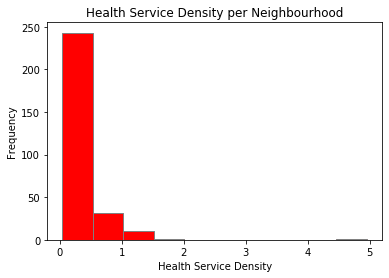

In [44]:
hsd_col = healthservice_density["healthservice_density"].to_numpy()
plt.hist(hsd_col, color="r", edgecolor="grey")
plt.xlabel("Health Service Density")
plt.ylabel("Frequency")
plt.title("Health Service Density per Neighbourhood")
plt.show()

## Find Population density per neighbourhood land area

In [46]:
query = """select area_name, population/land_area AS population_density from neighbourhoods 
            ORDER BY population_density DESC;
            """

population_density = pd.read_sql(query,conn)
population_density
# print(population_density['area_name'][2] == hs['area_name'][0])
# hs['area_name'][0]


,area_name,population_density
0,Holsworthy Military Area,NaN
1,Potts Point - Woolloomooloo,163.187114
2,Pyrmont - Ultimo,161.522468
3,Darlinghurst,144.854142
4,Surry Hills,137.264438
...,...,...
307,Bilpin - Colo - St Albans,0.012735
308,Rookwood Cemetery,0.009950
309,Royal National Park,0.002010
310,Blue Mountains - North,0.000218


/opt/jupyterhub/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/jupyterhub/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


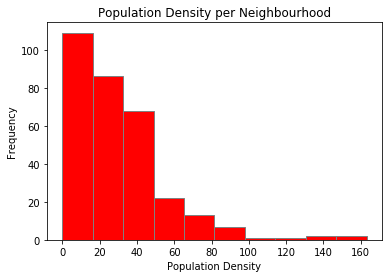

In [47]:
popd_col = population_density["population_density"].to_numpy()
plt.hist(popd_col, color="r", edgecolor="grey")
plt.xlabel("Population Density")
plt.ylabel("Frequency")
plt.title("Population Density per Neighbourhood")
plt.show()

## Find Population Age Percentage

In [49]:
query = """select area_name,CASE
WHEN total_persons = NULL OR total_persons = 0 Then NULL
ELSE (age_70_to_74 + age_75_to_79 + age_80_to_84 + age_85_and_over)/total_persons::float 
END AS "Percentage_of_population_age_70_over"
from population_stats_2016 ;"""

population_age = pd.read_sql(query,conn)
population_age

,area_name,Percentage_of_population_age_70_over
0,Braidwood,0.140684
1,Karabar,0.078584
2,Queanbeyan,0.104673
3,Queanbeyan - East,0.068726
4,Queanbeyan Region,0.058732
...,...,...
571,Lilli Pilli - Port Hacking - Dolans Bay,0.100184
572,Woolaware - Burraneer,0.100693
573,Engadine,0.107778
574,Loftus - Yarrawarrah,0.105178


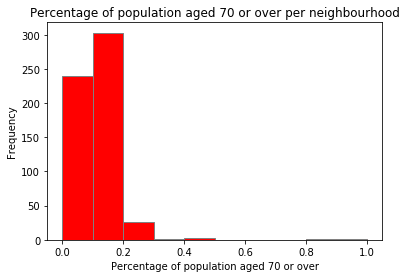

In [51]:
perc_pop_age = population_age["Percentage_of_population_age_70_over"].to_numpy()
plt.hist(perc_pop_age, color="r", edgecolor="grey")
plt.xlabel("Percentage of population aged 70 or over")
plt.ylabel("Frequency")
plt.title("Percentage of population aged 70 or over per neighbourhood")
plt.show()

## Find hospital bed density

In [52]:
query = """SELECT n.area_name, SUM(h.num_beds)/(n.population/1000) AS "num_beds_density"
             FROM neighbourhoods n JOIN health_services h ON (ST_Within(h.geom, n.geom)) 
			 GROUP BY n.area_name,n.population
			 ORDER BY num_beds_density DESC NULLS LAST;"""

hospital_bed_density = pd.read_sql(query,conn)
hospital_bed_density


,area_name,num_beds_density
0,St Leonards - Naremburn,66.0
1,Northmead,61.0
2,Kogarah,61.0
3,Liverpool,54.0
4,Randwick - South,53.0
...,...,...
281,Castle Hill - West,NaN
282,Cherrybrook,NaN
283,Manly Vale - Allambie Heights,NaN
284,Belmore - Belfield,NaN


/opt/jupyterhub/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/jupyterhub/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


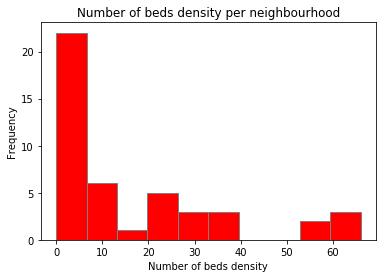

In [54]:
num_beds_density = hospital_bed_density["num_beds_density"].to_numpy()
plt.hist(num_beds_density, color="r", edgecolor="grey")
plt.xlabel("Number of beds density")
plt.ylabel("Frequency")
plt.title("Number of beds density per neighbourhood")
plt.show()

# Creating joint dataframe of the values

In [34]:
new_df_1 = pd.DataFrame(hospital_bed_density, columns = ['area_name', 'num_beds_density'])
new_df_2 = pd.DataFrame(population_age, columns = ['area_name', 'Percentage_of_population_age_70_over'])
new_df_3 = pd.DataFrame(population_density, columns = ['area_name', 'population_density'])
new_df_4 = pd.DataFrame(healthservice_density, columns = ['area_name',  'healthservice_density'])

#df_final = pd.concat([new_df_1, new_df_2, new_df_3, new_df_4])

df_final = pd.merge(new_df_1, new_df_2, on='area_name')
df_final = pd.merge(df_final, new_df_3, on='area_name')
df_final = pd.merge(df_final, new_df_4, on='area_name')

df_final


#final_data_table = """CREATE TABLE final_data (
 #               area_name VARCHAR(50),
 #               num_beds_density INTEGER,
 #               population_age INTEGER,
  #              population_density INTEGER,
  #              healthservice_density INTEGER
  #              
  #          );"""

# pgquery(conn, "SET search_path to covid")
# pgquery(conn, final_data_table)

# # Loading data into final_data_table

# for index, row in df_final.iterrows():
#     if str(row[1]) == "nan":
#         row[1] = None
#     if str(row[2]) == "nan":
#         row[2] = None
#     if str(row[3]) == "nan":
#         row[3] = None
#     if str(row[4]) == "nan":
#         row[4] = None
#     conn.execute("INSERT INTO final_data VALUES (%s, %s, %s, %s, %s)", (row[0], row[1], row[2], row[3], row[4]))





,area_name,num_beds_density,Percentage_of_population_age_70_over,population_density,healthservice_density
0,St Leonards - Naremburn,66.0,0.056213,41.289388,0.438596
1,Northmead,61.0,0.078692,37.191977,0.634460
2,Kogarah,61.0,0.085203,55.072072,1.390479
3,Liverpool,54.0,0.079881,46.819117,1.081629
4,Randwick - South,53.0,0.080166,42.211681,0.983284
...,...,...,...,...,...
281,Castle Hill - West,NaN,0.054925,32.811736,0.186289
282,Cherrybrook,NaN,0.098131,23.655315,0.256174
283,Manly Vale - Allambie Heights,NaN,0.106755,19.062433,0.112164
284,Belmore - Belfield,NaN,0.110939,44.587949,0.149054


## Closing Connection

In [55]:
conn.close()